# 1 Loading and Reviewing the data-set

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


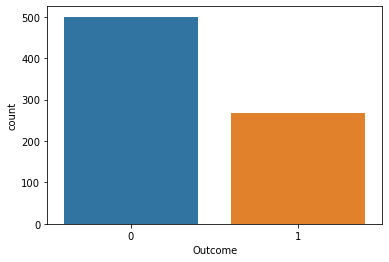

In [3]:
sns.countplot(x="Outcome", data=df);

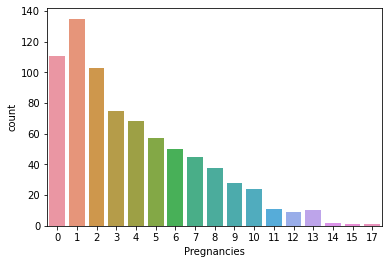

In [4]:
sns.countplot(x="Pregnancies", data=df);

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

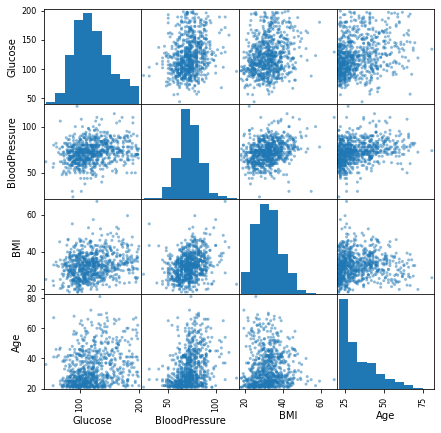

In [8]:
scatter_matrix(df[['Glucose','BloodPressure','BMI','Age']], figsize=(7,7));

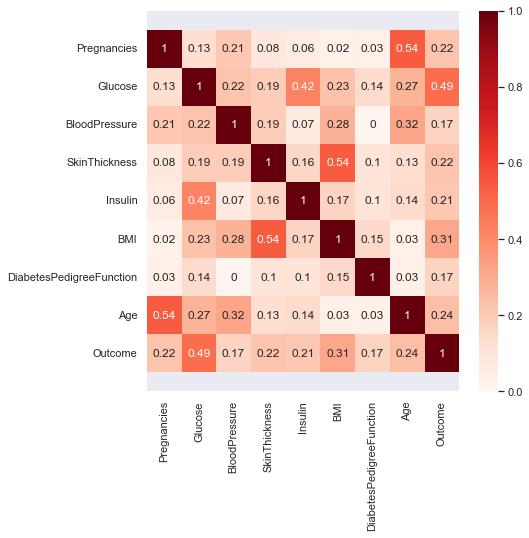

In [9]:
correlation_matrix = np.absolute(df.corr().round(2))
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);

# 2 Building the Model

## 2.1 Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [11]:
x = df.loc[:, 'Pregnancies':'Age']
y = df['Outcome']

In [12]:
model = DecisionTreeClassifier(random_state=0, max_depth=3)

In [13]:
model.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [14]:
export_graphviz(model, out_file='diabetes_tree.dot',
                feature_names=x.columns,
                class_names=['Diabetes', 'NOT diabetes'],
                rounded=True, proportion=False,
                precision=2, filled=True)

In [15]:
from subprocess import call
call(['dot', '-Tpng', 'diabetes_tree.dot', '-o', 'diabetes_tree.png', '-Gdpi=600']);

FileNotFoundError: [WinError 2] 系统找不到指定的文件。

In [16]:
plt.figure(figsize=(14,20))
plt.imshow(plt.imread('diabetes_tree.png'))
plt.axis('off');
plt.show();

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_tree.png'

<Figure size 1008x1440 with 0 Axes>

## 2.2 Pruning decision trees

In [17]:
model = DecisionTreeClassifier(random_state=0, max_depth=6, ccp_alpha=0.01)
model.fit(x,y)
export_graphviz(model, outfile='diabetes_tree.dot',
               feature_names=x.columns,
               class_names=['Diabetes','NOT diabetes'],
               rounded=True, proportion=False,
               precision=2, filled=True)
from subprocess import call
call(['dot','-Tpng','diabetes_tree.dot','-o','diabetes_tree.png','-Gdpi=600']);
plt.figure(figsize=(7,7))
plt.imshow(plt.imread('diabetes_tree.png'))
plt.axis('off');
plt.show();

TypeError: export_graphviz() got an unexpected keyword argument 'outfile'

# 3 Random Forrest Classifier

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## 3.1 Random Forrest Classifier Performance

In [19]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

0.7857142857142857

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


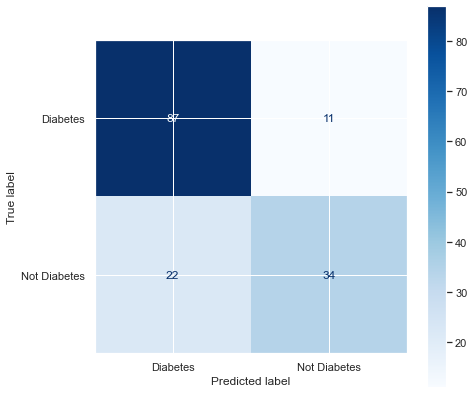

In [22]:
plot_confusion_matrix(rfc,x_test,y_test,display_labels=['Diabetes','Not Diabetes'],cmap=plt.cm.Blues,)
plt.show()

## 3.2 Decision Tree performance

In [23]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.7532467532467533

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


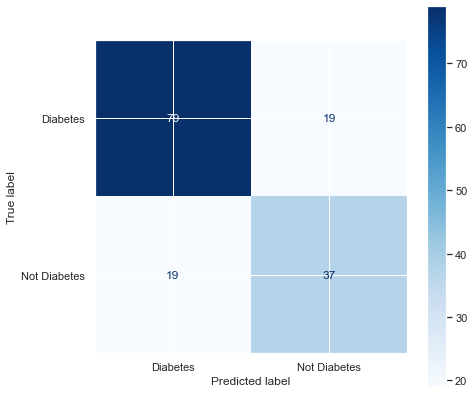

In [25]:
plot_confusion_matrix(dtc,x_test,y_test,display_labels=['Diabetes','Not Diabetes'],cmap=plt.cm.Blues,)
plt.show()

# 4 Hyper-parameter Tuning

In [26]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## 4.1 Manually searching for the best hyper-parameters

- ccp_alpha: a number between 0 and 1
- criterion: 'entropy' or 'gini'
- max_depth: a number greater than 0
- max_leaf_nodes: a number greater than 1

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


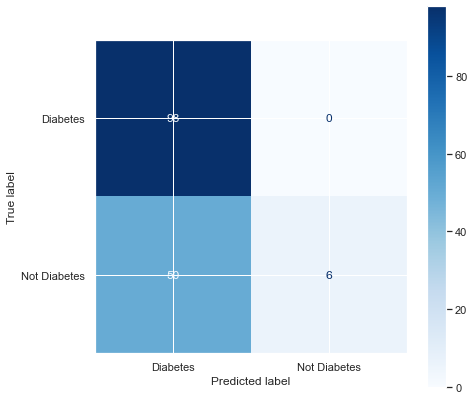

0.6753246753246753


In [27]:
rfc = RandomForestClassifier(ccp_alpha=0.04, criterion='entropy', max_depth=8, max_leaf_nodes=2)
rfc.fit(x_train, y_train)
plot_confusion_matrix(rfc, x_test, y_test, display_labels=['Diabetes', 'Not Diabetes'], cmap=plt.cm.Blues,)
plt.show()
print(rfc.score(x_test,y_test))

## 4.2 Automated search of optimum hyper-parameters

In [28]:
param_grid = [
    {'ccp_alpha':[0.0,0.005,0.007,0.01,0.015,0.02,0.03,0.05,0.1],
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,6,7,8,9],
    'max_leaf_nodes':[2,3,4,5,6,7,8,9]}
]

In [29]:
clf = GridSearchCV(estimator=rfc,
                  param_grid=param_grid)
best_model = clf.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
plot_confusion_matrix(best_model,x_test,y_test,display_labels=['Diabetes','Not Diabetes'], cmap=plt.cm.Blues,)
plt.show()

In [ ]:
print(best_model.score(x_test,y_test))